In [1]:
from ps_utils import *
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import scipy.io as sio
plt.rcParams['figure.figsize'] = (20.0, 15.0)

In [2]:
beethoven = sio.loadmat('Beethoven.mat')
buddha = sio.loadmat('Buddha.mat')

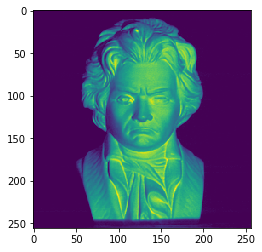

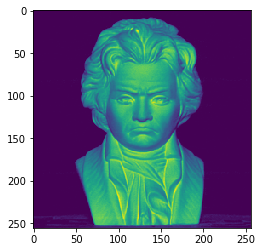

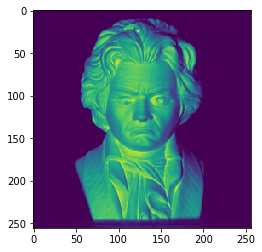

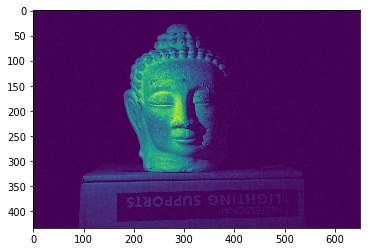

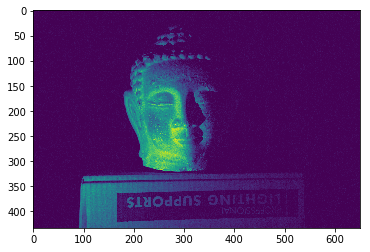

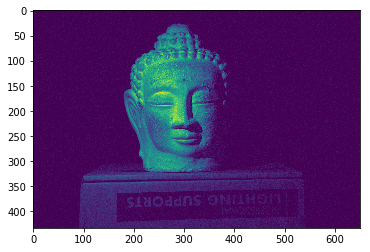

In [3]:
plt.imshow(beethoven['I'][:,:,0])
plt.show()
plt.imshow(beethoven['I'][:,:,1])
plt.show()
plt.imshow(beethoven['I'][:,:,2])
plt.show()

plt.imshow(buddha['I'][:,:,0])
plt.show()
plt.imshow(buddha['I'][:,:,1])
plt.show()
plt.imshow(buddha['I'][:,:,2])
plt.show()

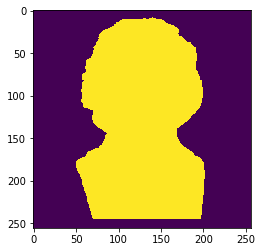

In [4]:
buddha['mask'].shape
buddha['S']

plt.imshow(beethoven['mask'])
plt.show()

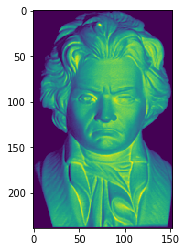

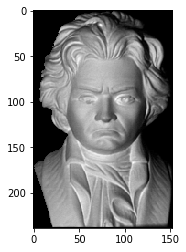

In [5]:
mask = beethoven["mask"][8:247,49:202]
beetm = beethoven["I"][8:247,49:202,:]

bboy = np.stack([beetm[:,:,0]*mask,beetm[:,:,1]*mask,beetm[:,:,2]*mask], axis=0)
bboy.shape
plt.imshow(bboy[0])
plt.show()
plt.imshow(bboy[2], 'gray')
plt.show()

In [6]:
S = beethoven['S']
image_shape = bboy[0].shape
bboy = np.reshape(bboy, (3,36567))

S = lin.inv(S)


dotpd = np.dot(S, bboy)
p = lin.norm(dotpd, axis=0)
N = dotpd / p

output = []

N = np.reshape(N, (3,image_shape[0],image_shape[1]))
print(N.shape, N.size)
output.append(N)



(3, 239, 153) 109701


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


/usr/local/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)
/usr/local/lib/python3.6/site-packages/matplotlib/colors.py:217: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
/usr/local/lib/python3.6/site-packages/matplotlib/colors.py:217: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


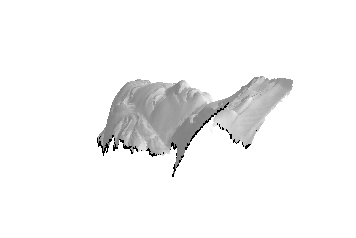

In [8]:
output_out = unbiased_integrate(N[0], N[1], N[2], mask, order=2)
display_depth_matplotlib(output_out)
#print(output[0][0].shape)